In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

In [6]:
gfw = GravityFramework.GravityFramework()

### Load data

In [7]:
foldername = r'/data/new_trap/20200210/Bead2/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

57  files in folder
57  files loaded


In [8]:
bb = bdf_discharge[0]
response_z = [np.std(bb.response_at_freq('z',drive_freq=151)) for bb in bdf_discharge]
response_x = [np.std(bb.response_at_freq('x',drive_freq=151)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


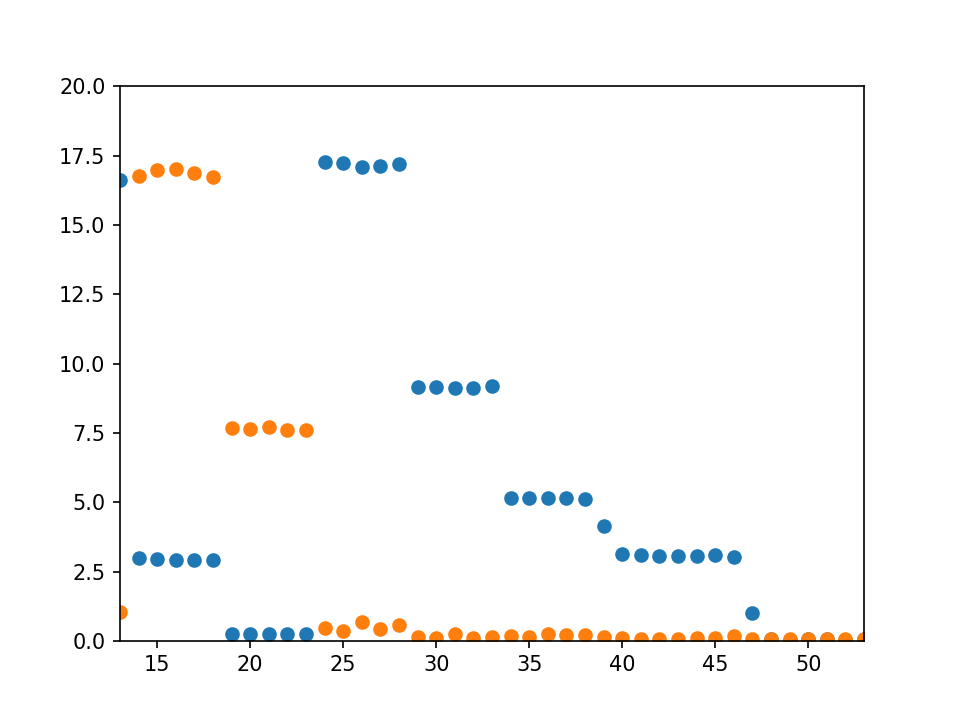

4460.518682913541


In [9]:
_, ax = plt.subplots()
ax.scatter(range(len(response_x)), response_z/response_z[47])
ax.scatter(range(len(response_x)), response_x/response_x[15]*17)
ax.set(xlim=(13,53), ylim=(0,20))
print(response_x[48])

In [10]:
bdf_z = bdf_discharge[40:46]
bdf_x = bdf_discharge[14:19]
m1s_z = gfw.build_z_response(bdf_z, drive_freq=151,charges=3, bandwidth=1, decimate=10, include_sigma=True)
m1s_x = gfw.build_x_response(bdf_x, drive_freq=151,charges=17, bandwidth=1)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  1.07e+03
reduced chi2:  7.911945610906001
***************************************************
Z2-amplitude:  1.06e+03
reduced chi2:  7.666345824446441
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.6955109990331545
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.706021260335391
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.726927610265385
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.705681054763986
Z2 response (amplitude): 1052.9094942729869
***************************************************
X2-amplitude:  9.32e+01
reduced chi2:  8.871076115573855
***************************************************
X2-amplitude:  9.45e+01
reduced chi2:  8.633933863134763
***************************************************
X2-amplitude:  9.44e+01
reduced

<IPython.core.display.Javascript object>


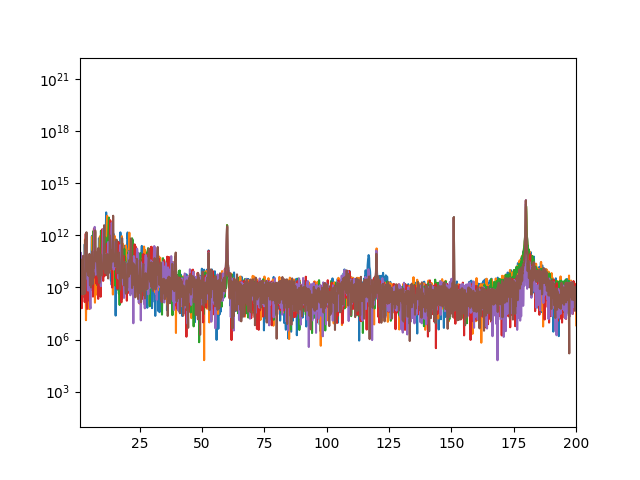

[(1, 200)]

In [11]:
_,ax = plt.subplots()
[ax.semilogy(*bb.psd('z')) for bb in bdf_z]
ax.set(xlim=(1,200))

### Transfer function

In [11]:
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_X_3.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_Y_3.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_Z_3.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)
tf_list = [tf_x, tf_y, tf_z]

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


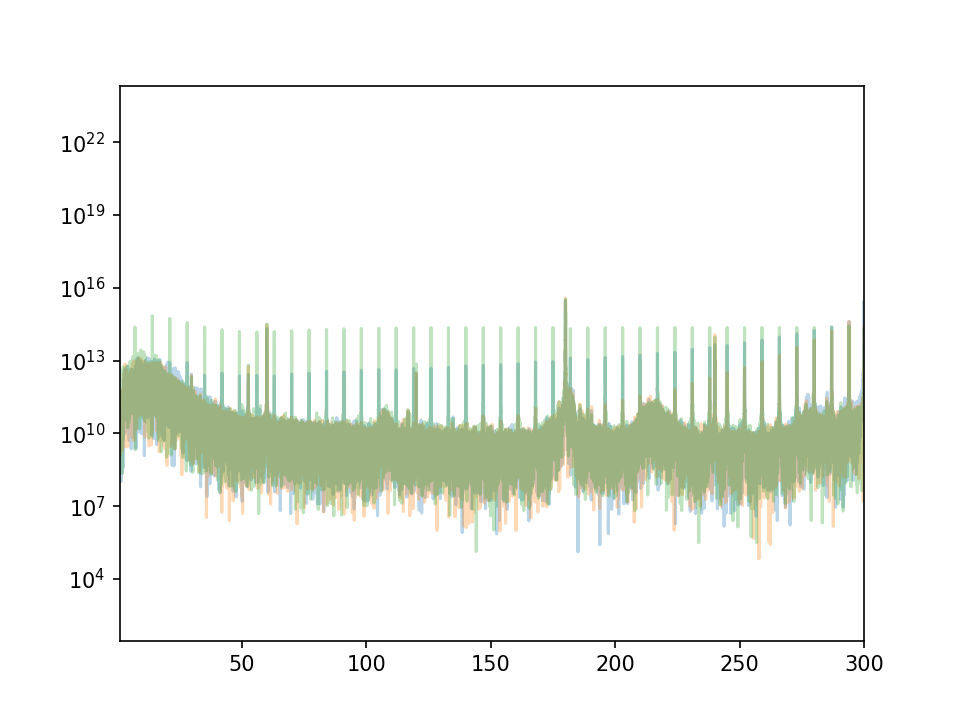

[(1, 300)]

In [13]:
_,ax = plt.subplots()
[ax.semilogy(*bb.psd('z'),alpha=0.3) for bb in tf_list]
ax.set(xlim=(1,300))

<IPython.core.display.Javascript object>


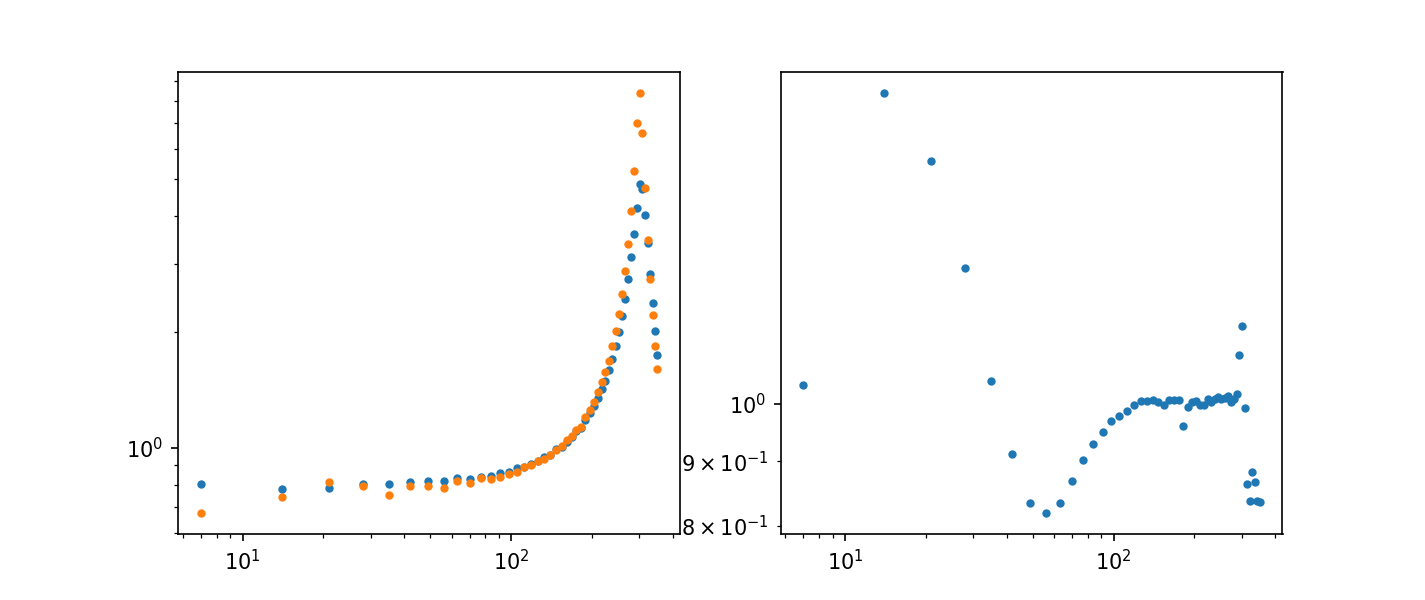

In [14]:
gfw.build_transfer_function(tf_list, plot=True)

In [15]:
foldername = r'/data/new_trap/20200210/Bead2/Shaking/Shaking_spin/'
datasets_num = 100
data_bdfs2 = load_dir(foldername, file_prefix='Shaking2',max_file=datasets_num)
data_bdfs4 = load_dir(foldername, file_prefix='Shaking4',max_file=datasets_num)
data_bdfs5 = load_dir(foldername, file_prefix='Shaking5',max_file=datasets_num)
data_bdfs6 = load_dir(foldername, file_prefix='Shaking6',max_file=datasets_num)
data_bdfs7 = load_dir(foldername, file_prefix='Shaking7',max_file=datasets_num)
spin_freqs = [0, 6, 8, 12, 16]

100  files in folder
100  files loaded
100  files in folder
100  files loaded
100  files in folder
100  files loaded
301  files in folder
100  files loaded
301  files in folder
100  files loaded


In [26]:
gfw.BDFs = data_bdfs

<IPython.core.display.Javascript object>


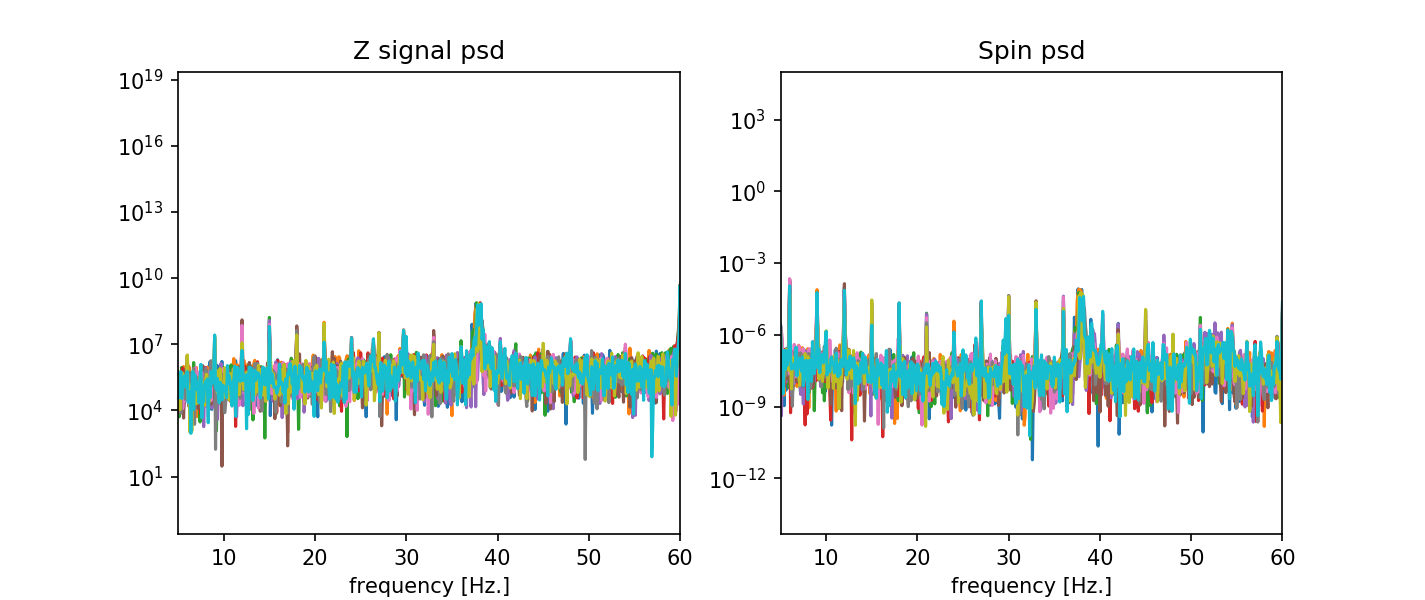

[(5, 60), Text(0.5, 0, 'frequency [Hz.]'), Text(0.5, 1.0, 'Spin psd')]

In [33]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
for bb in data_bdfs7[::10]:
    ax[0].semilogy(*bb.psd2('z'))
    x = bb.spin_data
    fft = np.abs(np.fft.rfft(x,norm='ortho'))**2
    freq = np.fft.rfftfreq(len(x), d=1./5000)
    ax[1].semilogy(freq,fft)
#     ax[1].semilogy(*bb.psd2('x'))
ax[0].set(xlim=(5,60),xlabel='frequency [Hz.]', title='Z signal psd')
ax[1].set(xlim=(5,60),xlabel='frequency [Hz.]', title='Spin psd')

In [28]:
gfw.build_noise_array(sideband_freq=20, bandwidth=2)
# gfw.BDFs = data_bdfs
gfw.build_noise_array_z(sideband_freq=20, bandwidth=2)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  0.6662000528794736
x3 noise rms:  0.2084457704775492
z2 noise level:  30.782905387146652  std:  15.551784492740541


In [29]:
m1s_z5 = gfw.build_z_response(bdf_z, drive_freq=151,charges=3, bandwidth=2, decimate=100, include_sigma=True)

***************************************************
Z2-amplitude:  1.06e+03
reduced chi2:  7.804653859644505
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.428520407445207
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.476885055735024
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.478576418979304
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.50718181170346
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.568282431272422
Z2 response (amplitude): 1046.7015808299


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [283]:
np.mean([m1_.values[3] for m1_ in m1s_z5]), np.std([m1_.values[3] for m1_ in m1s_z5])

(152.85431011865384, 32.41170236769793)

In [50]:
gfw.scale_Z2, gfw.tf_ffts[2]

(2049781582428802.0,
 array([1.13370116, 1.30761381, 1.12879453, 1.30412491, 0.67349737,
        0.92065544, 0.78698129, 0.65996182, 0.90722819, 0.80740429,
        0.81568378, 0.88174077, 0.9975739 , 0.9638038 , 0.94236515,
        1.00410001, 0.97825629, 1.01369981, 1.01159055, 0.98463149,
        0.9941386 , 1.00439605, 1.00477528, 1.03610635, 0.98737038,
        1.01430075, 1.03989577, 1.03819126, 1.05205843, 1.03848771,
        1.08148211, 1.04797809, 1.0148529 , 0.97768474, 0.94334023,
        0.91603735, 0.85543115, 0.73856123, 0.64484303, 0.94733709,
        1.7493425 , 1.89980454, 1.91967978, 1.62809113, 1.45505277,
        1.27743966, 1.30707363, 1.1933053 , 1.10434401, 1.09722203]))

In [38]:
gfw.fsamp

5000

### profile likelihood

In [31]:
fit_kwargs = {'alpha': 0, 'phase': 0, 'sigma': 17, 'error_alpha': 0.01, 'error_phase': 1, 'error_sigma': 1,
              'errordef': 1,
              'limit_alpha': [-100, 100], 'limit_phase': [-10,10], 'limit_sigma': [0,None],
              'fix_alpha': True, 'fix_phase': True, 'fix_sigma': False, 'print_level': 0}

fit_kwargs2 = {'alpha': 0, 'phase': 0, 'sigma': 17, 'error_alpha': 0.01, 'error_phase': 1, 'error_sigma': 1,
              'errordef': 1,
              'limit_alpha': [-100, 100], 'limit_phase': [-5,5], 'limit_sigma': [0,None],
              'fix_alpha': False, 'fix_phase': False, 'fix_sigma': False, 'print_level': 0}
min_18_z = []
datasets_num = 300
bandwidth = 2
center_freq = 18
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num) 
    min_18_z.append(gfw.get_alpha_mle_pl(bdf=bb, center_freq=center_freq, noise_freq=center_freq+bandwidth, 
                                             bandwidth=bandwidth, decimate=100, direction1='z',
                          x_focous=389.0, frequency=3, lambda_par=0.0001, height=6e-6, suppress_print=False,
                          **fit_kwargs2)[2])

0 / 300
Separation (face to face):  4.48853876937685
Stroke:  100.4559472543749
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.09e-02
sigma mle:  2.90e+01
reduced chi2:  0.12373947952478373
1 / 300
Separation (face to face):  4.487038401626114
Stroke:  100.45704381863159
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -3.77e-03
sigma mle:  2.68e+01
reduced chi2:  0.12117733385528683
2 / 300
Separation (face to face):  4.4875404981856715
Stroke:  100.45692412136343
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alp

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Separation (face to face):  4.489325641538221
Stroke:  100.45619208899565
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.59e-03
sigma mle:  2.90e+01
reduced chi2:  0.12377381084501927
6 / 300
Separation (face to face):  4.489310839930317
Stroke:  100.4566681857276
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.81e-03
sigma mle:  2.69e+01
reduced chi2:  0.12132666444738514
7 / 300
Separation (face to face):  4.489022944074327
Stroke:  100.45647817887325
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  

***************************************************
alpha mle:  2.86e-03
sigma mle:  2.42e+01
reduced chi2:  0.11797406300944735
33 / 300
Separation (face to face):  4.491280019403154
Stroke:  100.45550678090848
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.68e-03
sigma mle:  2.40e+01
reduced chi2:  0.11766322003694779
34 / 300
Separation (face to face):  4.4908690436957155
Stroke:  100.45617927581486
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -7.07e-04
sigma mle:  2.53e+01
reduced chi2:  0.1193802252583637
35 / 300
Separation (face to face):  4.491041922860836
Stroke:  100.45595058863132
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for

***************************************************
alpha mle:  6.51e-03
sigma mle:  2.40e+01
reduced chi2:  0.11774640547370364
56 / 300
Separation (face to face):  4.4892469598039835
Stroke:  100.45567188680504
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -3.20e-03
sigma mle:  2.91e+01
reduced chi2:  0.12381170107651626
57 / 300
Separation (face to face):  4.489903953552789
Stroke:  100.45562308543408
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  6.43e-03
sigma mle:  2.18e+01
reduced chi2:  0.11467551145752634
58 / 300
Separation (face to face):  4.489255302975641
Stroke:  100.45562678586475
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 fo

***************************************************
alpha mle:  9.15e-03
sigma mle:  2.69e+01
reduced chi2:  0.12129487459729815
80 / 300
Separation (face to face):  4.490804830634351
Stroke:  100.45609735085257
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -6.35e-03
sigma mle:  2.59e+01
reduced chi2:  0.12247462985381045
81 / 300
Separation (face to face):  4.489998724293718
Stroke:  100.45621999783485
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  8.77e-03
sigma mle:  2.28e+01
reduced chi2:  0.11612208733424585
82 / 300
Separation (face to face):  4.489459859793589
Stroke:  100.456526093799
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for l

A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -2.09e-04
sigma mle:  2.14e+01
reduced chi2:  0.11407099152701658
107 / 300
Separation (face to face):  4.492271990444328
Stroke:  100.45721040382966
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.78e-03
sigma mle:  2.11e+01
reduced chi2:  0.11365392161460412
108 / 300
Separation (face to face):  4.493439946331284
Stroke:  100.4560137523787
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  7.44e-04
sigma mle:  2.12e+01
reduced chi2:  0.11369857960416507
109 / 300
Separation (face to face):  4.493290869394661
Stroke:  100.456000804306

***************************************************
alpha mle:  6.72e-03
sigma mle:  2.32e+01
reduced chi2:  0.1166770248542149
135 / 300
Separation (face to face):  4.491055298023047
Stroke:  100.45657778613321
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.38e-03
sigma mle:  2.61e+01
reduced chi2:  0.1203407117732113
136 / 300
Separation (face to face):  4.492121234320427
Stroke:  100.45593717405855
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.72e-03
sigma mle:  2.65e+01
reduced chi2:  0.1208696514424253
137 / 300
Separation (face to face):  4.491928277671013
Stroke:  100.45584977361364
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for 

***************************************************
alpha mle:  -6.51e-03
sigma mle:  2.69e+01
reduced chi2:  0.12138391314344937
163 / 300
Separation (face to face):  4.492408602824616
Stroke:  100.45671972993404
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -9.62e-03
sigma mle:  3.12e+01
reduced chi2:  0.12610222827466647
164 / 300
Separation (face to face):  4.4942040545813935
Stroke:  100.45683418128388
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.01e-03
sigma mle:  2.10e+01
reduced chi2:  0.11337152313565667
165 / 300
Separation (face to face):  4.494342629731511
Stroke:  100.45669119131996
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-0

***************************************************
alpha mle:  -4.96e-03
sigma mle:  2.22e+01
reduced chi2:  0.11523448557150948
187 / 300
Separation (face to face):  4.4929327793995295
Stroke:  100.45645959080451
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -2.80e-03
sigma mle:  2.26e+01
reduced chi2:  0.11573603325879059
188 / 300
Separation (face to face):  4.492636343009485
Stroke:  100.45686502925601
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.87e-03
sigma mle:  2.84e+01
reduced chi2:  0.12308470092163662
189 / 300
Separation (face to face):  4.492626425805531
Stroke:  100.45693654330256
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-0

***************************************************
alpha mle:  -2.92e-03
sigma mle:  6.05e+01
reduced chi2:  0.14729759958587668
210 / 300
Separation (face to face):  4.497295263142211
Stroke:  100.4559941878096
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.22e-02
sigma mle:  6.73e+01
reduced chi2:  0.1507018309067833
211 / 300
Separation (face to face):  4.49270794593034
Stroke:  100.4568815859262
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -4.90e-03
sigma mle:  5.66e+01
reduced chi2:  0.14515060200025598
212 / 300
Separation (face to face):  4.494126286341759
Stroke:  100.4563728892812
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for 

***************************************************
alpha mle:  -5.55e-03
sigma mle:  7.57e+01
reduced chi2:  0.15442909459949827
235 / 300
Separation (face to face):  4.490513316691112
Stroke:  100.45638064913466
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.40e-03
sigma mle:  6.53e+01
reduced chi2:  0.14972179543305628
236 / 300
Separation (face to face):  4.491969907311818
Stroke:  100.45690354322265
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.80e-02
sigma mle:  9.23e+01
reduced chi2:  0.1608028770210424
237 / 300
Separation (face to face):  4.493021324062829
Stroke:  100.45626421809692
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 f

Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.15e-02
sigma mle:  1.13e+02
reduced chi2:  0.16717024803910133
259 / 300
Separation (face to face):  4.494828198225127
Stroke:  100.45609098858138
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.51e-02
sigma mle:  1.56e+02
reduced chi2:  0.17757327354850638
260 / 300
Separation (face to face):  4.495016760232295
Stroke:  100.45631510728373
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -2.32e-02
sigma mle:  1.40e+02
reduced chi2:  0.1743013380942303
261 / 300
Separ

***************************************************
alpha mle:  -7.51e-03
sigma mle:  3.61e+01
reduced chi2:  0.13080323158013005
285 / 300
Separation (face to face):  4.494221102166511
Stroke:  100.45585710460313
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  5.39e-03
sigma mle:  4.19e+01
reduced chi2:  0.1355253610573633
286 / 300
Separation (face to face):  4.4915795692649905
Stroke:  100.45625037300371
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 4.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -3.29e-03
sigma mle:  3.70e+01
reduced chi2:  0.13157101272854105
287 / 300
Separation (face to face):  4.493649125870752
Stroke:  100.45566614772056
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04

In [32]:
m_18_alpha = [m1_.values[0] for m1_ in min_18_z]
m_18_sigma = [m1_.values[2] for m1_ in min_18_z]

m_6_alpha = [m1_.values[0] for m1_ in min_6_z]
m_6_sigma = [m1_.values[2] for m1_ in min_6_z]


<IPython.core.display.Javascript object>


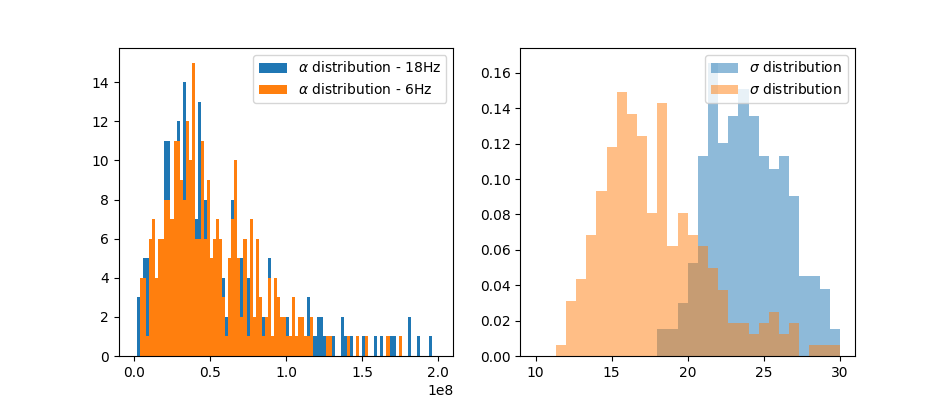

6th hsrmonic mean:  0.0018297655170974754  error:  0.00015242943831088435
estimated limit:  1.67e+06


/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


In [35]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].hist(np.array(np.abs(m_18_alpha))*1e10, range=(0,0.02*1e10), bins=100, label=r'$\alpha$ distribution - 18Hz')
ax[0].hist(np.array(np.abs(m_6_alpha))*1e10, range=(0,0.02*1e10), bins=100, label=r'$\alpha$ distribution - 6Hz')

ax[1].hist(m_18_sigma,range=(10,30),bins=30,alpha=0.5,normed=True, label=r'$\sigma$ distribution')
ax[1].hist(m_6_sigma,range=(10,30),bins=30,alpha=0.5,normed=True, label=r'$\sigma$ distribution')
[a.legend() for a in ax]
print('6th hsrmonic mean: ',np.mean(m_18_alpha), ' error: ', np.std(m_18_alpha)/np.sqrt(3000))
print('estimated limit: ', format(np.std(np.abs(m_18_alpha))/np.sqrt(5000)*2*1e10,"5.2e"))

<IPython.core.display.Javascript object>


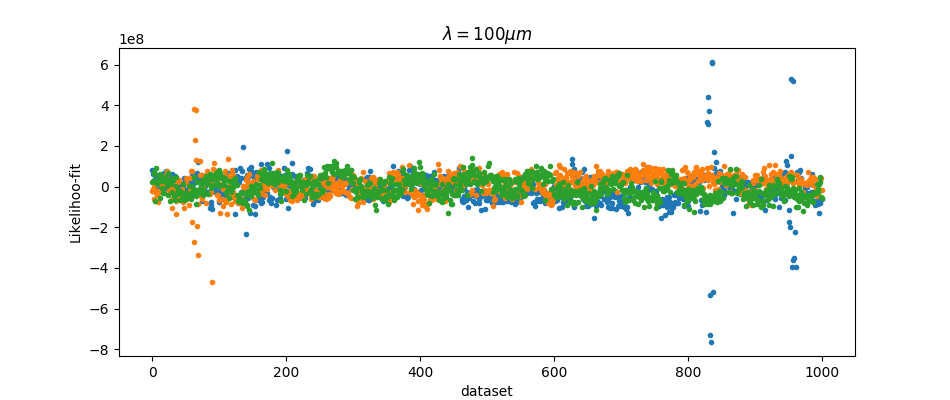

[Text(0, 0.5, 'Likelihoo-fit'),
 Text(0.5, 0, 'dataset'),
 Text(0.5, 1.0, '$\\lambda=100 \\mu m $')]

In [179]:
_, ax = plt.subplots(figsize=(9.5,4))
ax.plot(range(len(m_18_alpha_1)),np.array(m_18_alpha_1)*1e10,'.')
ax.plot(range(len(m_18_alpha_1)),np.array(m_18_alpha_2)*1e10,'.')
ax.plot(range(len(m_18_alpha_1)),np.array(m_18_alpha_3)*1e10,'.')
ax.set(xlabel='dataset', ylabel=r'Likelihoo-fit', title=r'$\lambda=100 \mu m $')

<IPython.core.display.Javascript object>


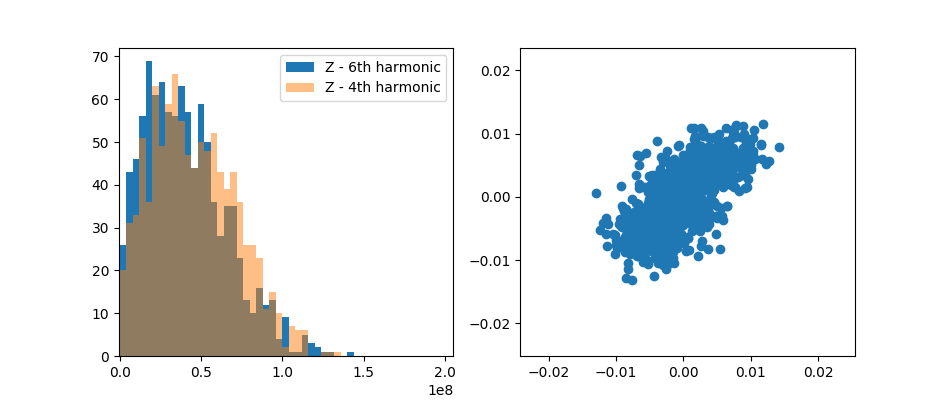

6th hsrmonic mean:  -0.0003798533920003564  error:  8.057684669983258e-05
12Hz mean:  -0.00047183749389132857  error:  8.177043140850047e-05


In [178]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].hist(np.abs(m_18_alpha_3)*1e10, range=(-0,0.02*1e10), bins=50, label=r'Z - 6th harmonic')
ax[0].hist(np.abs(m_12_alpha_3)*1e10, range=(-0,0.02*1e10), bins=50, alpha=0.5, label=r'Z - 4th harmonic')
ax[0].legend()
ax[1].scatter((m_18_alpha_3),(m_12_alpha_3))
print('6th hsrmonic mean: ',np.mean(m_18_alpha_3), ' error: ', np.std(np.abs(m_18_alpha_3))/np.sqrt(1000))
print('12Hz mean: ',np.mean(m_12_alpha_3), ' error: ', np.std(np.abs(m_12_alpha_3))/np.sqrt(1000))

### Spinning at different frequencies

In [ ]:
foldername = r'/data/new_trap/20200210/Bead2/Shaking/Shaking_spin/'
datasets_num = 100
data_bdfs2 = load_dir(foldername, file_prefix='Shaking2',max_file=datasets_num)
data_bdfs4 = load_dir(foldername, file_prefix='Shaking4',max_file=datasets_num)
data_bdfs5 = load_dir(foldername, file_prefix='Shaking5',max_file=datasets_num)
data_bdfs6 = load_dir(foldername, file_prefix='Shaking6',max_file=datasets_num)
data_bdfs7 = load_dir(foldername, file_prefix='Shaking7',max_file=datasets_num)
spin_freqs = [0, 6, 8, 12, 16]

In [35]:
spin_bdf = [data_bdfs2, data_bdfs4, data_bdfs5, data_bdfs6, data_bdfs7]

<IPython.core.display.Javascript object>


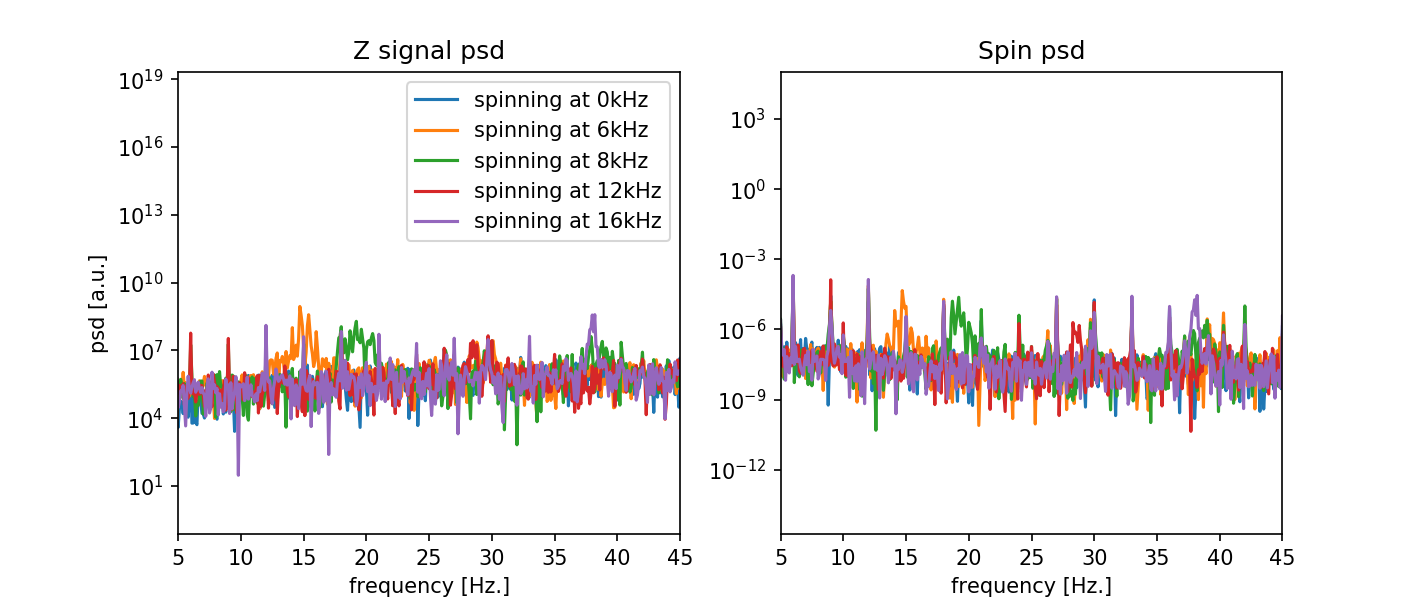

In [46]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
for bb1, label in zip(spin_bdf, spin_freqs):
    bb = bb1[50]
    ax[0].semilogy(*bb.psd2('z'), label = 'spinning at '+str(label)+'kHz')
    x = bb.spin_data
    fft = np.abs(np.fft.rfft(x,norm='ortho'))**2
    freq = np.fft.rfftfreq(len(x), d=1./5000)
    ax[1].semilogy(freq,fft)
#     ax[1].semilogy(*bb.psd2('x'))
ax[0].set(xlim=(5,45),xlabel='frequency [Hz.]', ylabel='psd [a.u.]', title='Z signal psd')
ax[1].set(xlim=(5,45),xlabel='frequency [Hz.]', title='Spin psd')
ax[0].legend()

<IPython.core.display.Javascript object>


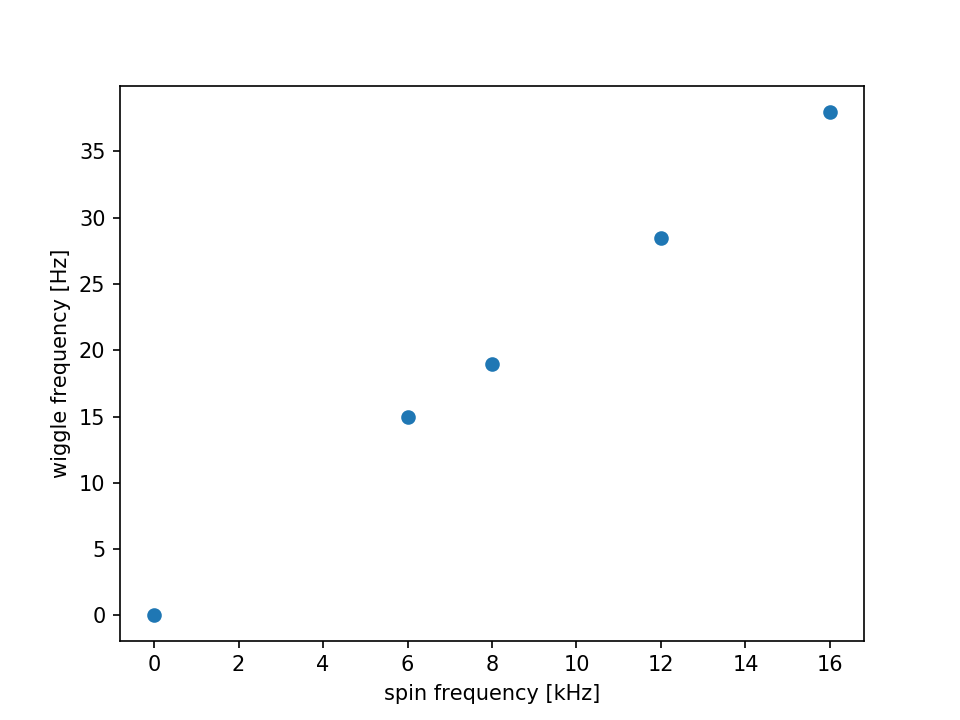

[Text(0, 0.5, 'wiggle frequency [Hz]'), Text(0.5, 0, 'spin frequency [kHz]')]

In [48]:
wiggle_freq = [0, 15, 19, 28.5, 38]
_,ax = plt.subplots()
ax.scatter(spin_freqs, wiggle_freq)
ax.set(xlabel='spin frequency [kHz]', ylabel='wiggle frequency [Hz]')